In [1]:
from src.functions import *

**Problema 5**: Em física de partículas, distribuições angulares podem descrever a probabilidade de observação de partículas em diferentes direções após colisões de alta energia. Como exemplo, considere a reação de aniquilação entre elétron e um pósitron para formar um par de múons ($\mu^+\mu^-$). A probabilidade de observar um múon em um determinado ângulo $\theta$ (medido a partir da direção do elétron incidente) é proporcional a:

$$
    P(\theta) \propto 1 + cos^2(\theta), \quad \text{com} \quad 0 \le \theta \le \pi.
$$

Sob essas condições, o problema propõe a geração de amostras do ângulo $\theta$ cuja distribuição segue a função de probabilidade acima usando métodos de Monte Carlo.

**(a)**: Normalize a distribuição de probabilidades $P(\theta)$, determinando o fator de normalização.

**(b)** Implemente um método de amostragem para gerar valores de $\theta$ que sigam $P(cos(\theta))$ utilizando métodos de Monte Carlo por rejeição, ou seja, sorteie ângulos $\theta$ uniformemente distribuídos em $[0, \pi]$. Assim, gere números aleatórios uniformes para decidir se cada $\theta$ proposto é aceito com base em sua probabilidade relativa $1 + cos^2(\theta)$.

**(c)** Crie um histograma dos valores de $\theta$ obtidos e compare com a distribuição teórica $P(\theta)$. Compare seu resultado com a Figura \ref{reference}.

**(d)** Calcule a média e a variância das amostras obtidas e compare com os valores teóricos para a distribuição normalizada.

**(e)** Realize testes estatísticos como Kolmogorov-Smirnov (K-S) e qui-quadrado para avaliar quantitativamente se as amostras obtidas são consistentes com a distribuição teórica.

### **Item (a)** Este item está feito no pdf

### **Item (b)** 

In [ ]:
n_samples = 10**6
M = 50
a=-1 
b=1

#Retorna lista de valores aceitos
#Foram sorteados valores uniformementes entre (-1,1) que é o equivalente de sortear entre (cos(0),cos(\pi)
samples = rejection_sampling(n_samples, a, b, M, Pcos, g)


print(r'Amostras aceitas para distribuição $P(cos(\theta))$ (Rejection samples)')


Amostras aceitas para distribuição $P(cos(\theta))$ (Rejection samples)


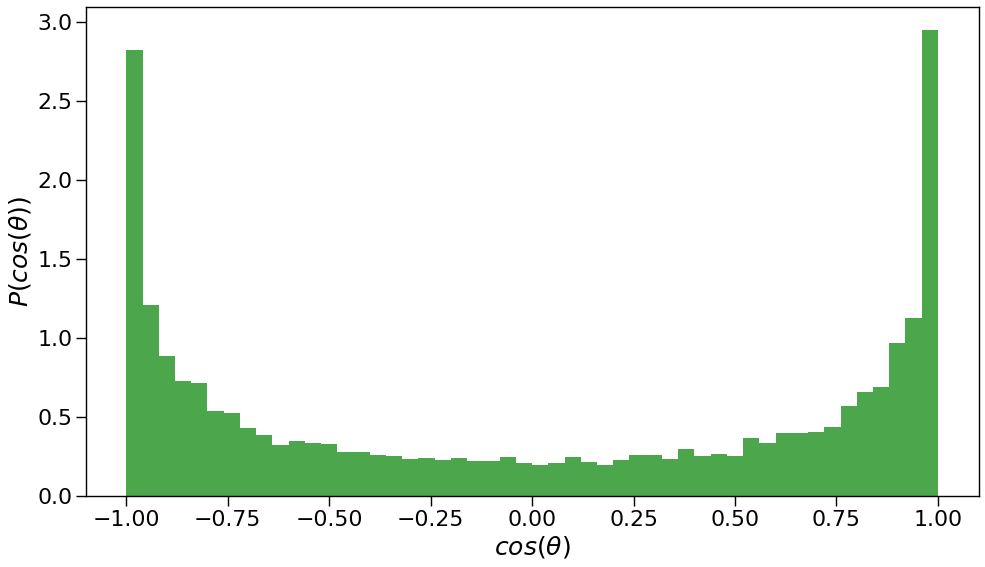

In [3]:
# Item (b) - Plot do Histograma <---------------
m = 200 # número de bins na distribuição
# x_aceito e p(x_aceito) empíricos
#Este resultado não está normalizado

fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Amostras", color='green')
plt.xlabel(r"$cos(\theta)$", size=25)
plt.ylabel(r"$P(cos(\theta))$", size=25)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.savefig("results/Questão5/RejectionEmpiricopcos.pdf")
plt.show()

### **Item (c)** 

In [ ]:
n_samples = 10**6
M = 100
a=0 
b=np.pi

# Retorna lista de valores aceitos
samples = rejection_sampling(n_samples, a, b, M, Ptheta, g)

print(r'Amostras aceitas para distribuição $P(\theta)$ (Rejection samples)')
#print(samples)

Amostras aceitas para distribuição $P(\theta)$ (Rejection samples)


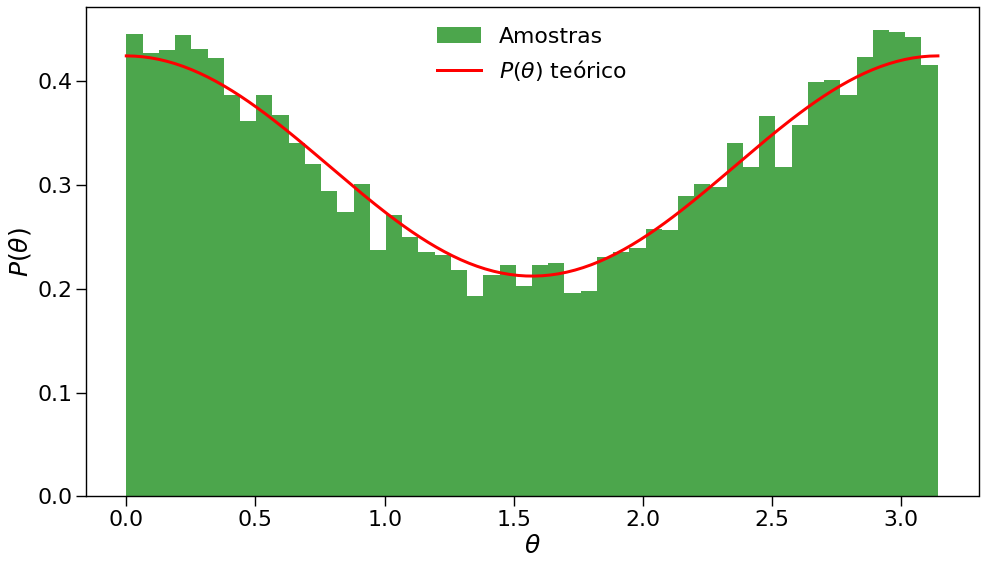

In [5]:
theta_teo= np.linspace(0, np.pi, 200)
Ptheta_teo = [Ptheta(i) for i in theta_teo]
fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Amostras", color='green')
plt.plot(theta_teo, Ptheta_teo, label=r'$P(\theta)$ teórico', mfc = "None", color = "red", linewidth=3)
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$\theta$", size=25)
plt.ylabel(r"$P(\theta)$", size=25)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.savefig("results/Questão5/RejectionEmpiricoP.pdf")
plt.show()

### **Item (d)** 

In [6]:
E = np.mean(samples) # Valor esperado das amostras (média)
var = np.var(samples) # Variância das amostras

E_teo = np.pi/2 # Valor esperado teórico
var_teo = (2/(3*np.pi))*(((np.pi)**3)/3+(np.pi**3)/6)-(np.pi/2)**2 # Variância teórica

Err_E = abs(E - E_teo)
Err_var = abs(var - var_teo)

print(f'E_medido = {E}, E_teórico = {E_teo}, Erro_Absoluto = {Err_E}')
print(f'var_medido = {var}, var_teórico = {var_teo}, Erro_Absoluto = {Err_var}')

E_medido = 1.5730730395590682, E_teórico = 1.5707963267948966, Erro_Absoluto = 0.002276712764171629
var_medido = 1.007337032451888, var_teórico = 0.8224670334241133, Erro_Absoluto = 0.18486999902777468


### **Item (e)** 

In [7]:
# Ordenar amostras
x_sorted = np.sort(samples)
x_min=0
x_max=np.pi

m = 200 # número de bins na distribuição

# Construir a CDF 
x_theoretical = np.linspace(x_min, x_max, len(x_sorted))
cdf_theoretical = np.cumsum(Ptheta(x_theoretical)) / np.sum(Ptheta(x_theoretical))

ks_stat, ks_p_value = kstest(x_sorted, lambda v: np.interp(v, x_theoretical, cdf_theoretical))


theta_data,Ptheta_data=distribution_data(samples, a, b, m)
theta_teo= np.linspace(0, np.pi, len(theta_data))
Ptheta_teo = [Ptheta(i) for i in theta_teo]

# Normalizar as listas, caso não sejam proporções ou probabilidades (soma = 1)
Ptheta_teo_norm = [x / sum(Ptheta_teo) for x in Ptheta_teo]
Ptheta_data_norm = [x / sum(Ptheta_data) for x in Ptheta_data]

# Aplicar o teste chi-quadrado
chi2_stat, chi2_p_value = chisquare(f_obs=Ptheta_teo_norm, f_exp=Ptheta_data_norm)

# Resultados com mais casas decimais
print(f"Estatística KS: {ks_stat:.10f}")
print(f"KS_Valor-p: {ks_p_value:.10f}")  # 10 casas decimais

# Resultados com mais casas decimais
print(f"Estatística qui-quadrado: {chi2_stat:.10f}")
print(f"Valor-p: {chi2_p_value:.10f}")  # 10 casas decimais

# Interpretação dos resultados
alpha = 0.05  # Nível de significância

# Teste KS
if ks_p_value < alpha:
    print("KS Test: Rejeitamos H0. As distribuições são diferentes.")
else:
    print("KS Test: Não rejeitamos H0. As distribuições podem ser iguais.")

# Teste Qui-Quadrado
if chi2_p_value < alpha:
    print("Qui-Quadrado: Rejeitamos H0. As distribuições são diferentes.")
else:
    print("Qui-Quadrado: Não rejeitamos H0. As distribuições podem ser iguais.")

Estatística KS: 0.0082065946
KS_Valor-p: 0.5082908169
Estatística qui-quadrado: 0.0191980518
Valor-p: 1.0000000000
KS Test: Não rejeitamos H0. As distribuições podem ser iguais.
Qui-Quadrado: Não rejeitamos H0. As distribuições podem ser iguais.
